<a href="https://colab.research.google.com/github/tomoyukiharada/Kaggle-team/blob/main/kaggle(2)_yoshida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##API

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
f = open("/content/drive/MyDrive/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

In [ ]:
!kaggle competitions download -c playground-series-s4e6

  0% 0.00/3.07M [00:00<?, ?B/s]
100% 3.07M/3.07M [00:00<00:00, 206MB/s]


In [ ]:
!unzip playground-series-s4e6.zip

Archive:  playground-series-s4e6.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


##データ読み込み

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import keras_tuner as kt
from keras_tuner import Hyperband

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [ ]:
train.isnull().any()

id                                                False
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                         

欠損値なし？

##データ成形

In [ ]:
target = pd.get_dummies(train["Target"], dtype="uint8")

In [ ]:
target

,Dropout,Enrolled,Graduate
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
76513,0,0,1
76514,0,0,1
76515,0,1,0
76516,1,0,0


##モデル作成（DNN）

In [79]:
train_ = train.drop(["id", "Target"], axis=1)
test_ = test.drop(["id"], axis=1)

In [84]:
print(train_.shape)
print(test_.shape)

(76518, 36)
(51012, 36)


In [81]:
train_test = pd.concat([train_, test_])

In [82]:
train_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,1,38,37,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,2,39,1,9119,1,19,133.1,1,19,37,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,1,1,1,171,1,1,127.0,1,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,1,1,3,9773,1,1,132.0,1,19,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [85]:
train_test_ = pd.get_dummies(train_test, columns=["Marital status", "Application mode", "Course", "Daytime/evening attendance", "Nacionality", "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International"], dtype="uint8", drop_first=True)

In [87]:
train_test_

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),...,Father's occupation_193,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,1,1,126.0,1,19,122.6,18,0,6,6,...,0,0,0,0,0,0,1,0,1,0
1,1,1,125.0,19,19,119.8,18,0,6,8,...,0,0,0,1,0,0,1,0,0,0
2,2,1,137.0,3,19,144.7,18,0,6,0,...,0,0,0,0,0,0,1,1,0,0
3,3,1,131.0,19,3,126.1,18,0,7,9,...,0,0,0,1,0,0,1,0,1,0
4,2,1,132.0,19,37,120.1,18,0,7,12,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,2,1,128.0,38,37,124.7,19,0,0,0,...,0,0,0,1,0,0,1,0,0,0
51008,1,19,133.1,19,37,140.0,33,0,5,6,...,0,0,0,0,0,1,0,1,0,0
51009,1,1,127.0,1,1,120.4,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
51010,3,1,132.0,19,19,126.3,18,0,6,8,...,0,0,0,1,0,1,0,0,0,0


In [93]:
train_s = train_test_.iloc[:76518,:]
test_s = train_test_.iloc[76518:,:]

In [94]:
print(train_s.shape)
print(test_s.shape)

(76518, 199)
(51012, 199)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(train_s, target, test_size=0.2, random_state=1)

In [96]:
X_train.shape[0]

61214

In [ ]:
def build_model(hp):
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(X_train.shape[1], )))
  for i in range(hp.Int("num_layer", 2, 20)):
    model.add(layers.Dense(hp.Int("units_" + str(i),
                            min_value=32,
                            max_value=512,
                            step=32),
                            activation="relu"))
    if hp.Choice("batchnorm_and_dropout", ["batch", "dropout", "both"]) == "batch":
      model.add(layers.BatchNormalization())
    elif hp.Choice("batchnorm_and_dropout", ["batch", "dropout", "both"]) == "drooput":
      model.add(layers.Dropout(0.1))
    else:
      model.add(layers.BatchNormalization())
      model.add(layers.Dropout(0.1))

  model.add(layers.Dense(3, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model





In [97]:
model =models.Sequential()
model.add(layers.Dense(512, input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(258, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3, activation="softmax"))

In [ ]:
tuner = Hyperband(build_model,
                              objective="accuracy",
                              max_epochs=10,
                              factor=3,
                              directory="my_dir",
                              project_name="first_keras")

Reloading Tuner from my_dir/first_keras/tuner0.json


In [ ]:
tuner.search(X_train, y_train, validation_split=0.2, epochs=100)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               95232     
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 258)               66306     
                                                                 
 batch_normalization_4 (Bat  (None, 258)               1032      
 chNormalization)                                     

In [100]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [102]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [101]:
X_train.shape

(61214, 199)

In [103]:
cs = keras.callbacks.EarlyStopping(monitor="accuracy", patience=10)

In [104]:
history = model.fit(X_train, y_train, epochs=150, batch_size=128, callbacks=cs)

Epoch 1/150
479/479 [==============================] - 6s 8ms/step - loss: 0.5402 - accuracy: 0.7886
Epoch 2/150
479/479 [==============================] - 4s 8ms/step - loss: 0.4858 - accuracy: 0.8115
Epoch 3/150
479/479 [==============================] - 4s 8ms/step - loss: 0.4775 - accuracy: 0.8133
Epoch 4/150
479/479 [==============================] - 4s 8ms/step - loss: 0.4693 - accuracy: 0.8195
Epoch 5/150
479/479 [==============================] - 4s 8ms/step - loss: 0.4684 - accuracy: 0.8183
Epoch 6/150
479/479 [==============================] - 4s 9ms/step - loss: 0.4652 - accuracy: 0.8200
Epoch 7/150
479/479 [==============================] - 4s 9ms/step - loss: 0.4640 - accuracy: 0.8197
Epoch 8/150
479/479 [==============================] - 4s 8ms/step - loss: 0.4650 - accuracy: 0.8191
Epoch 9/150
479/479 [==============================] - 4s 8ms/step - loss: 0.4619 - accuracy: 0.8209
Epoch 10/150
479/479 [==============================] - 4s 8ms/step - loss: 0.4620 - accura

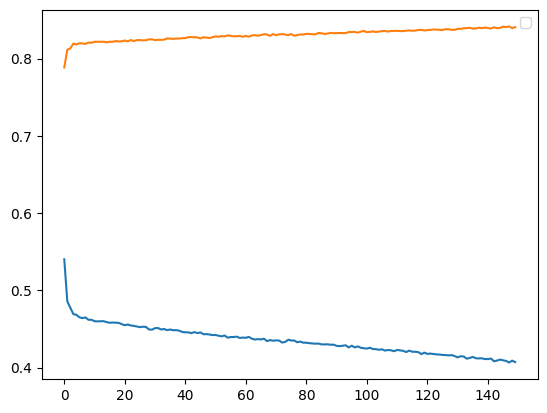

In [105]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend()
plt.show()

In [106]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

479/479 [==============================] - 1s 2ms/step


In [107]:
y_test = np.argmax(y_test, axis=1)

In [108]:
y_test

array([0, 1, 0, ..., 2, 2, 2])

In [109]:
accuracy_score(y_test, pred)

0.803450078410873

##submission_csv作成

In [110]:
test_s

,Application order,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),...,Father's occupation_193,Father's occupation_194,Father's occupation_195,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,1,1,141.0,3,1,152.1,18,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,128.0,1,19,116.5,19,0,6,7,...,0,0,0,0,0,0,1,0,0,0
2,1,1,118.0,1,19,114.2,18,0,6,11,...,0,0,0,0,0,0,1,0,1,0
3,1,39,130.0,1,19,130.0,23,2,6,15,...,0,0,0,0,0,0,1,0,1,0
4,1,1,110.0,1,37,106.0,26,0,6,9,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,2,1,128.0,38,37,124.7,19,0,0,0,...,0,0,0,1,0,0,1,0,0,0
51008,1,19,133.1,19,37,140.0,33,0,5,6,...,0,0,0,0,0,1,0,1,0,0
51009,1,1,127.0,1,1,120.4,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
51010,3,1,132.0,19,19,126.3,18,0,6,8,...,0,0,0,1,0,1,0,0,0,0


In [115]:
sub_pred = model.predict(test_s)
sub_pred_ = pd.DataFrame(sub_pred)

1595/1595 [==============================] - 3s 2ms/step


In [116]:
yoshida = pd.concat([test["id"], sub_pred_], axis=1)

In [118]:
yoshida.head()

,id,0,1,2
0,76518,0.949911,0.017154,0.032935
1,76519,0.041592,0.025722,0.932685
2,76520,0.014626,0.134127,0.851247
3,76521,0.122204,0.352600,0.525196
4,76522,0.214729,0.580142,0.205129


##アンサンブル

In [72]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 1.8 MB/s eta 0:00:00


In [73]:
osada = pd.read_excel("academic_predict_proba_results.xlsx")

In [74]:
osada.head()

,id,dropout,enroll,graduate
0,76518,0.882,0.080,0.038
1,76519,0.028,0.066,0.906
2,76520,0.096,0.334,0.570
3,76521,0.256,0.368,0.376
4,76522,0.416,0.488,0.096


In [139]:
osada["dropout"]

0        0.882
1        0.028
2        0.096
3        0.256
4        0.416
         ...  
51007    0.808
51008    0.986
51009    0.872
51010    0.812
51011    0.926
Name: dropout, Length: 51012, dtype: float64

In [149]:
ansamble={}
ansamble[0] = (yoshida[0] + osada["dropout"])/2
ansamble[1] = (yoshida[1] + osada["enroll"])/2
ansamble[2] = (yoshida[2] + osada["graduate"])/2

In [152]:
ansamble_ = pd.DataFrame(ansamble)

In [153]:
submission = np.argmax(ansamble_, axis=1)

In [156]:
submission_ = pd.DataFrame(submission)
submission_f = pd.concat([test["id"], submission_], axis=1)

In [157]:
submission_f

,id,0
0,76518,0
1,76519,2
2,76520,2
3,76521,2
4,76522,1
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0
